In [318]:
from helpers import webscraping_jobs
import pandas as pd
import datetime
import time
import re
import numpy as np 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL  import Image

In [4]:
df = webscraping_jobs('ingeniero',20)

Web Scraping Finalizado!
Total de Ofertas laborales extraidas: 400


In [5]:
#reemplazar variables nulas con terminologia unica NaN
df = df.replace("nan",np.nan)

#Reemplazar variables Nulas en variable empresa por valor no informa
df['empresa'] = df['empresa'].replace(np.nan,"No Informa")

#Limpiar variable educacion
df['educacion'] = df['educacion'].str.replace("<li>Educación mínima: ","").str.replace(".</li>","").str.replace(" / I.P. / C.F.T","").str.replace(" C.H. / Técnic","")

#limpiar variable oferta
df['oferta'] = df['oferta'].str.replace(r"[^_]*[Rr]equiere|\s[dD]e|\d","").str.replace("/a","").str.replace("(a)","")

#Agregar columna de fecha de descarga de informacion
df['fecha descarga'] = datetime.date.today()

In [6]:
#cambiar tipo de dato de variable salario a decimal
df['salario'] = df['salario'].astype("float")

In [21]:
#Eliminar filas duplicadas en case de haber
df = df.drop_duplicates()

In [38]:
#Corregir salarios con montos elevados por errores de tipeo
df['salario'].iloc[239] = 1111111.0
df['salario'].iloc[124] = 1111111.0

In [50]:
df.to_csv("data-jobs.csv",index=False,encoding='utf-8')

In [314]:
df = pd.read_csv("data-jobs.csv")

In [315]:
#Contar la frecuencia en que se repiten las palabras de cada oferta laboral
wordlist = []
for  sentence in df['oferta'].tolist():
    words =  sentence.split()
    for word in words:
        wordlist.append(word.lower().lstrip())
wordfreq = [wordlist.count(w) for w in wordlist]

In [316]:
#Crear dataframe de palabras y frecuencia en cada oferta de trabajo
data_words = pd.DataFrame({'words':wordlist,'frequency':wordfreq}).drop_duplicates().sort_values(['frequency'],ascending=False)

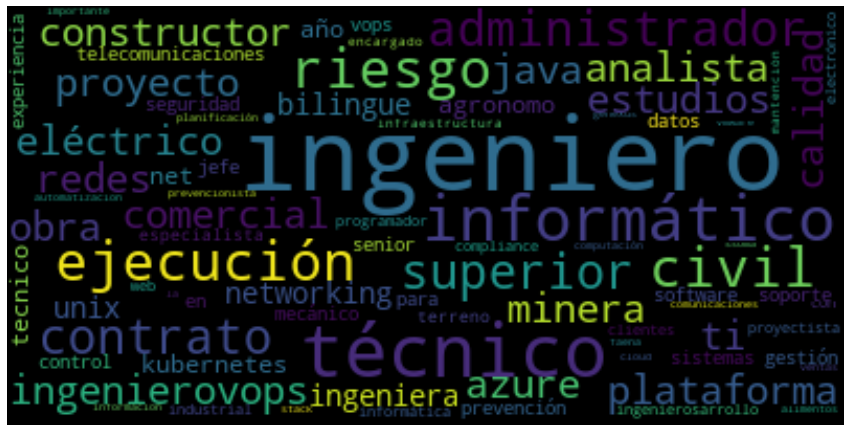

In [339]:
#Crear nube de palabras para palabras con mayor frecuencia en ofertas laborales
text = " ".join(review for review in data_words.words)

wordcloud = WordCloud(max_font_size=50,max_words=80,background_color="black").generate(str(text))

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.png",format="png")
plt.show()